DUA ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
#LOADING AND EXPLORING DATA
df1 = pd.read_csv('C:/Users/sjn17/Downloads/mobile_app_analytics/data/sub_data/dau_1results.csv')
df2 = pd.read_csv('C:/Users/sjn17/Downloads/mobile_app_analytics/data/sub_data/dau_2results.csv')
 
 #examine structure
print(df1.head())
print(df1.columns)
print(df1.info())
print(df2.head())
print(df2.columns)
print(df2.info())

         date   dau  total_sessions  avg_session_duration  \
0  2025-07-03  2189            2189             72.073261   
1  2025-07-04  2203            2203             73.048642   
2  2025-07-05  2834            2834             76.144241   
3  2025-07-06  2861            2861             73.483202   
4  2025-07-07  2202            2202             73.449907   

   total_screens_viewed  avg_screens_per_session  
0                 80124                36.603015  
1                 81678                37.075806  
2                109110                38.500353  
3                105855                36.999301  
4                 81891                37.189373  
Index(['date', 'dau', 'total_sessions', 'avg_session_duration',
       'total_screens_viewed', 'avg_screens_per_session'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------               

In [4]:
df2

,date,dau,activity_level
0,2025-08-02,3015,Peak Day
1,2025-08-03,2971,Regular Day
2,2025-07-12,2926,Regular Day
3,2025-07-26,2922,Regular Day
4,2025-07-13,2903,Regular Day
...,...,...,...
56,2025-07-10,2120,Regular Day
57,2025-08-29,2093,Regular Day
58,2025-08-28,2063,Regular Day
59,2025-08-27,2045,Regular Day


In [5]:
#merging over common date column:
df = df1.merge(df2, on='date', how='outer')
df
df = df.drop(columns=['dau_y'])
df
df.rename(columns={' dua_x': 'dau'}, inplace=True)
df.columns

Index(['date', 'dau_x', 'total_sessions', 'avg_session_duration',
       'total_screens_viewed', 'avg_screens_per_session', 'activity_level'],
      dtype='object')

In [6]:
# renaming dua_x
cols = df.columns.tolist()
print("Current columns:", cols)

# Replace the second column (index 1) which appears to be dau_x
cols[1] = 'dau'
df.columns = cols

print("After rename:", df.columns.tolist())
df
df.to_csv('C:/Users/sjn17/Downloads/mobile_app_analytics/data/advanced_dua.csv', index=True)

Current columns: ['date', 'dau_x', 'total_sessions', 'avg_session_duration', 'total_screens_viewed', 'avg_screens_per_session', 'activity_level']
After rename: ['date', 'dau', 'total_sessions', 'avg_session_duration', 'total_screens_viewed', 'avg_screens_per_session', 'activity_level']


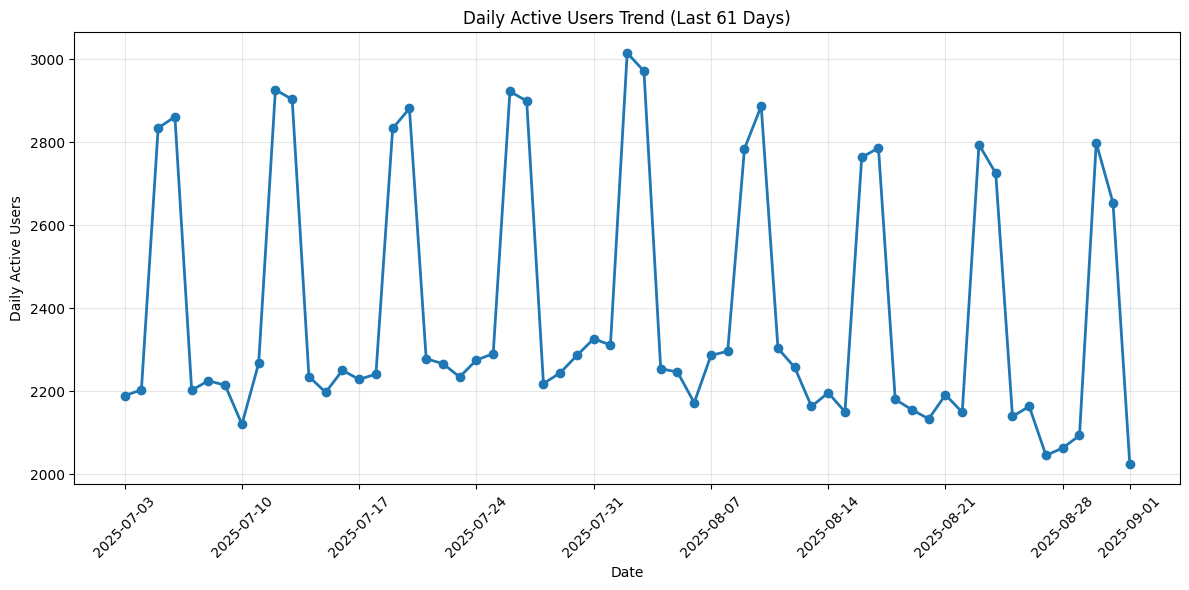

In [7]:
#DUA TREND LINE CHART
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['dau'], marker='o', linewidth=2)
plt.title('Daily Active Users Trend (Last 61 Days)')
plt.xlabel('Date')
plt.ylabel('Daily Active Users')

positions = [0, 7, 14, 21, 28, 35, 42, 49, 56,60]  
positions = [p for p in positions if p < len(df)]

ax = plt.gca()
ax.set_xticks([df.index[i] for i in positions])
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
# -------------------------------------------------------------------
# Rolling Window Week-over-Week and Month-over-Month % Change
# -------------------------------------------------------------------
import pandas as pd
import numpy as np

# Ensure proper sorting
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# Rolling averages
df['dau_7d_avg']  = df['dau'].rolling(7).mean()
df['dau_30d_avg'] = df['dau'].rolling(30).mean()

# Compare with prior windows
df['wow_change'] = ((df['dau_7d_avg'] / df['dau_7d_avg'].shift(7) - 1) * 100).round(2)
df['mom_change'] = ((df['dau_30d_avg'] / df['dau_30d_avg'].shift(30) - 1) * 100).round(2)

# Clean up infinite/missing values
df[['wow_change', 'mom_change']] = df[['wow_change', 'mom_change']].replace([np.inf, -np.inf], np.nan)

# Show preview
recent = df[['date', 'dau', 'dau_7d_avg', 'dau_30d_avg', 'wow_change', 'mom_change']].tail(10)
print("\n=== Recent DAU % Changes (Rolling windows) ===")
print(recent.to_string(index=False))



=== Recent DAU % Changes (Rolling windows) ===
      date  dau  dau_7d_avg  dau_30d_avg  wow_change  mom_change
2025-08-23 2794 2341.142857  2420.900000       -1.98         NaN
2025-08-24 2725 2332.428571  2435.400000       -1.75         NaN
2025-08-25 2139 2326.571429  2409.300000       -1.27         NaN
2025-08-26 2163 2327.714286  2384.766667       -0.60         NaN
2025-08-27 2045 2315.142857  2379.000000       -0.96         NaN
2025-08-28 2063 2296.857143  2372.966667       -1.71         NaN
2025-08-29 2093 2288.857143  2366.533333       -2.05         NaN
2025-08-30 2798 2289.428571  2382.266667       -2.21         NaN
2025-08-31 2654 2279.285714  2393.700000       -2.28       -0.76
2025-09-01 2025 2263.000000  2360.700000       -2.73       -3.23


In [9]:
# -------------------------------------------------------------------
# Calendar-based Weekly and Monthly % Change
# -------------------------------------------------------------------

# Weekly (mean DAU per calendar week) → WoW %
weekly = (df.set_index('date')['dau']
          .resample('W-MON')   # weeks ending Monday
          .mean())
weekly_df = pd.DataFrame({
    'week_end': weekly.index,
    'weekly_dau_mean': weekly.values,
    'wow_pct': (weekly.pct_change() * 100).round(2)
})

# Monthly (mean DAU per calendar month) → MoM %
monthly = (df.set_index('date')['dau']
           .resample('M')
           .mean())
monthly_df = pd.DataFrame({
    'month_end': monthly.index,
    'monthly_dau_mean': monthly.values,
    'mom_pct': (monthly.pct_change() * 100).round(2)
})

print("\n=== Weekly WoW (calendar) ===")
print(weekly_df.tail(6).to_string(index=False))

print("\n=== Monthly MoM (calendar) ===")
print(monthly_df.tail(3).to_string(index=False))



=== Weekly WoW (calendar) ===
  week_end  weekly_dau_mean  wow_pct
2025-07-28      2443.428571     1.16
2025-08-04      2486.714286     1.77
2025-08-11      2424.857143    -2.49
2025-08-18      2356.428571    -2.82
2025-08-25      2326.571429    -1.27
2025-09-01      2263.000000    -2.73

=== Monthly MoM (calendar) ===
 month_end  monthly_dau_mean  mom_pct
2025-07-31       2415.413793      NaN
2025-08-31       2391.032258    -1.01
2025-09-30       2025.000000   -15.31


C:\Users\sjn17\AppData\Local\Temp\ipykernel_19072\294603177.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')


In [10]:
import pandas as pd

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# ---------------------------------------------------
# 4. Identify significant drops in DAU
# ---------------------------------------------------
df['dau_change'] = df['dau'].diff()   # day-to-day change
df['pct_change'] = df['dau'].pct_change() * 100  # % change

# Define a drop threshold (e.g., >10% decrease)
drop_threshold = -10
drops = df[df['pct_change'] <= drop_threshold][['date', 'dau', 'pct_change']]

print("=== Significant DAU Drops (>=10% decrease) ===")
print(drops)

# ---------------------------------------------------
# 5. Check for patterns: weekdays vs weekends
# ---------------------------------------------------
df['weekday'] = df['date'].dt.day_name()
weekday_avg = df.groupby('weekday')['dau'].mean().sort_values()

print("\n=== Average DAU by Weekday ===")
print(weekday_avg)

# Highlight weekend vs weekday
weekend_avg = df[df['weekday'].isin(['Saturday','Sunday'])]['dau'].mean()
weekday_avg_val = df[~df['weekday'].isin(['Saturday','Sunday'])]['dau'].mean()

print(f"\nWeekend Average DAU: {weekend_avg:.0f}")
print(f"Weekday Average DAU: {weekday_avg_val:.0f}")


=== Significant DAU Drops (>=10% decrease) ===
         date   dau  pct_change
4  2025-07-07  2202  -23.033904
11 2025-07-14  2235  -23.010679
18 2025-07-21  2278  -20.930233
25 2025-07-28  2218  -23.490859
32 2025-08-04  2254  -24.133288
39 2025-08-11  2303  -20.228611
46 2025-08-18  2180  -21.751615
53 2025-08-25  2139  -21.504587
60 2025-09-01  2025  -23.700075

=== Average DAU by Weekday ===
weekday
Wednesday    2187.125000
Monday       2203.777778
Thursday     2208.222222
Tuesday      2219.125000
Friday       2222.222222
Sunday       2840.777778
Saturday     2852.111111
Name: dau, dtype: float64

Weekend Average DAU: 2846
Weekday Average DAU: 2208


In [11]:
df

,date,dau,total_sessions,avg_session_duration,total_screens_viewed,avg_screens_per_session,activity_level,dau_7d_avg,dau_30d_avg,wow_change,mom_change,dau_change,pct_change,weekday
0,2025-07-03,2189,2189,72.073261,80124,36.603015,Regular Day,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
1,2025-07-04,2203,2203,73.048642,81678,37.075806,Regular Day,NaN,NaN,NaN,NaN,14.0,0.639561,Friday
2,2025-07-05,2834,2834,76.144241,109110,38.500353,Regular Day,NaN,NaN,NaN,NaN,631.0,28.642760,Saturday
3,2025-07-06,2861,2861,73.483202,105855,36.999301,Regular Day,NaN,NaN,NaN,NaN,27.0,0.952717,Sunday
4,2025-07-07,2202,2202,73.449907,81891,37.189373,Regular Day,NaN,NaN,NaN,NaN,-659.0,-23.033904,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2025-08-28,2063,2063,73.289100,77608,37.619001,Regular Day,2296.857143,2372.966667,-1.71,NaN,18.0,0.880196,Thursday
57,2025-08-29,2093,2093,72.117697,77302,36.933588,Regular Day,2288.857143,2366.533333,-2.05,NaN,30.0,1.454193,Friday
58,2025-08-30,2798,2798,71.454849,102139,36.504289,Regular Day,2289.428571,2382.266667,-2.21,NaN,705.0,33.683708,Saturday
59,2025-08-31,2654,2654,70.592594,95766,36.083647,Regular Day,2279.285714,2393.700000,-2.28,-0.76,-144.0,-5.146533,Sunday


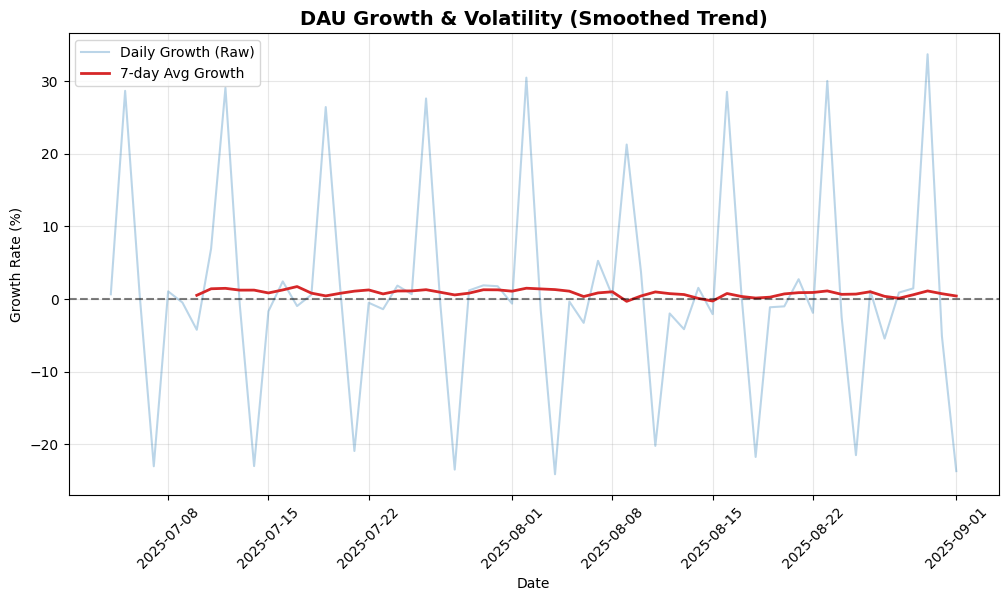

In [12]:
#Growth & Volatility (Smoothed DAU Growth)
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily and rolling DAU growth
df['dau_growth'] = df['dau'].pct_change() * 100
df['dau_growth_smooth'] = df['dau_growth'].rolling(7).mean()

# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df['date'], df['dau_growth'], alpha=0.3, color='#1f77b4', label="Daily Growth (Raw)")
ax.plot(df['date'], df['dau_growth_smooth'], linewidth=2, color='#d62728', label="7-day Avg Growth")

# Labels and style
ax.axhline(0, color='black', linestyle='--', alpha=0.5)
ax.set_title("DAU Growth & Volatility (Smoothed Trend)", fontsize=14, fontweight='bold')
ax.set_xlabel("Date")
ax.set_ylabel("Growth Rate (%)")
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.show()


Identify drops and patterns

In [13]:
# Find significant drops (e.g., >10% decline WoW)
significant_drops = df[df['wow_change'] < -10]

if not significant_drops.empty:
    print("Significant WoW Drops Detected:")
    for _, row in significant_drops.iterrows():
        print(f" - {row['date'].strftime('%Y-%m-%d')}: {row['dau']} DAU "
              f"({row['wow_change']:.1f}% drop)")
else:
    print("No significant WoW drops (>10%) detected.")

# Add day of week for pattern analysis
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = df['date'].dt.weekday >= 5

# Weekend vs weekday analysis
weekend_avg = df[df['is_weekend']]['dau'].mean()
weekday_avg = df[~df['is_weekend']]['dau'].mean()

print("\nWeekend vs Weekday DAU Comparison:")
print(f" - Weekend Average DAU : {weekend_avg:.0f}")
print(f" - Weekday Average DAU : {weekday_avg:.0f}")
print(f" - Difference          : {weekend_avg - weekday_avg:.0f} "
      f"({(weekend_avg/weekday_avg - 1)*100:.1f}%)")


No significant WoW drops (>10%) detected.

Weekend vs Weekday DAU Comparison:
 - Weekend Average DAU : 2846
 - Weekday Average DAU : 2208
 - Difference          : 638 (28.9%)


SESSION DURATION ANALYSIS

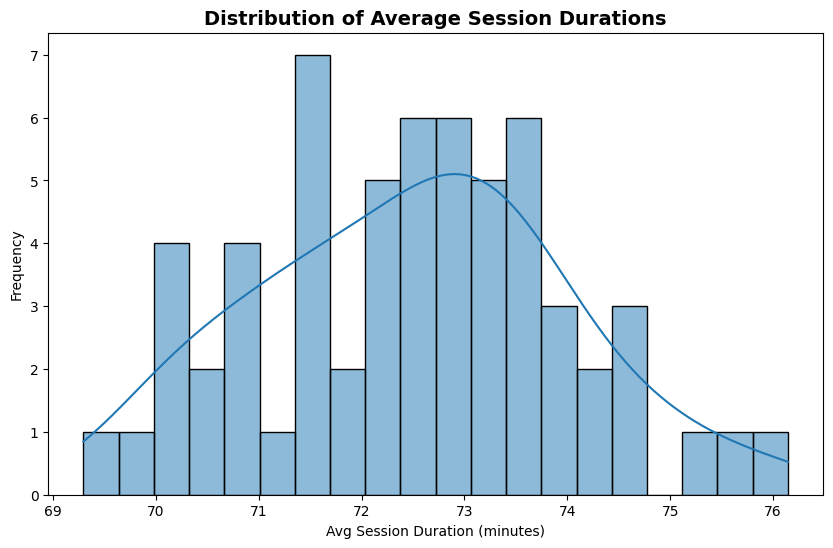

In [14]:
#1.Distribution of Session Durations (Histogram)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(df['avg_session_duration'], bins=20, kde=True, color='#1f77b4', ax=ax)

ax.set_title("Distribution of Average Session Durations", fontsize=14, fontweight='bold')
ax.set_xlabel("Avg Session Duration (minutes)")
ax.set_ylabel("Frequency")
plt.show()


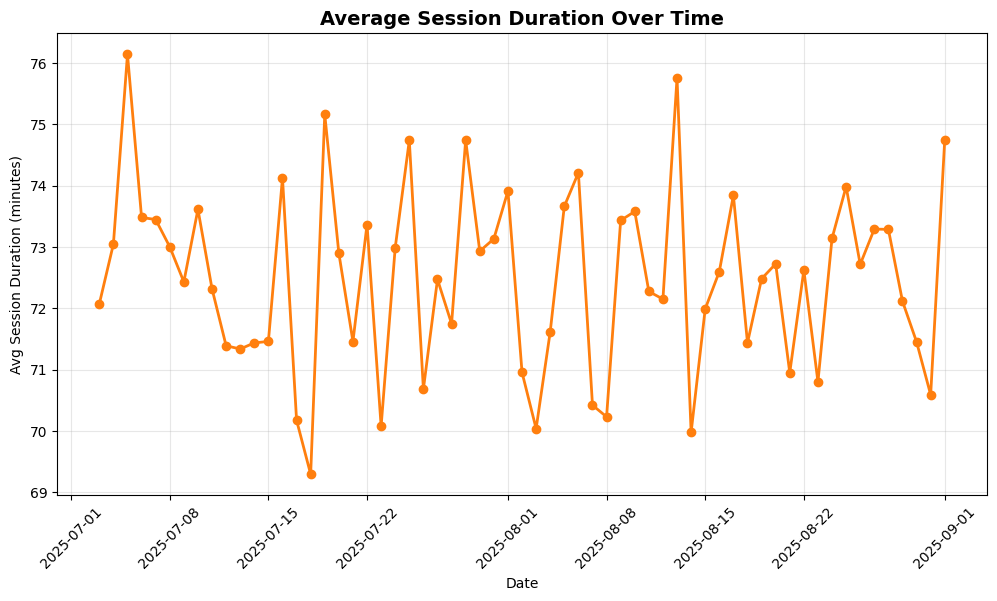

In [15]:
#2. Trend of Session Duration Over Time
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df['date'], df['avg_session_duration'], marker='o', color='#ff7f0e', linewidth=2)

ax.set_title("Average Session Duration Over Time", fontsize=14, fontweight='bold')
ax.set_xlabel("Date")
ax.set_ylabel("Avg Session Duration (minutes)")
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()


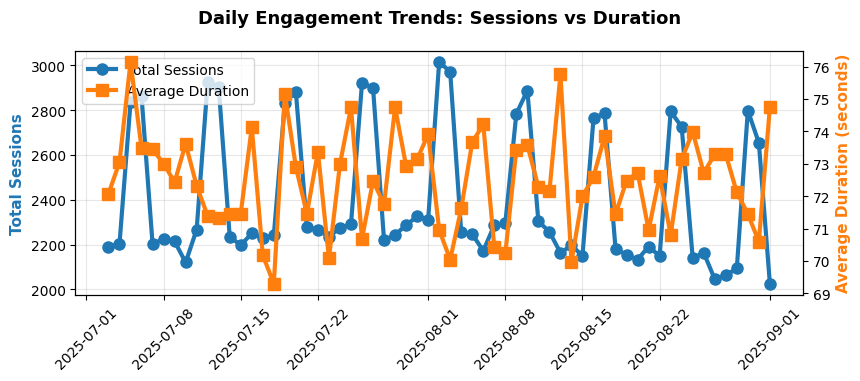

In [16]:
#3. Dual-axis engagement trends (top left, spans 2 columns)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

df['date'] = pd.to_datetime(df['date'])

# Set style and color palette
plt.style.use('default')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
sns.set_palette(colors)

# Create main figure with custom grid layout
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(4, 4, figure=fig, hspace=0.35, wspace=0.3)

ax1 = fig.add_subplot(gs[0, :2])
ax1_twin = ax1.twinx()

# Plot sessions and duration on different y-axes
line1 = ax1.plot(df['date'], df['total_sessions'], 'o-', color=colors[0], 
                 linewidth=3, markersize=8, label='Total Sessions')
line2 = ax1_twin.plot(df['date'], df['avg_session_duration'], 's-', color=colors[1], 
                      linewidth=3, markersize=8, label='Average Duration')

ax1.set_ylabel('Total Sessions', color=colors[0], fontweight='bold', fontsize=11)
ax1_twin.set_ylabel('Average Duration (seconds)', color=colors[1], fontweight='bold', fontsize=11)
ax1.set_title('Daily Engagement Trends: Sessions vs Duration', fontsize=13, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Combine legends from both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

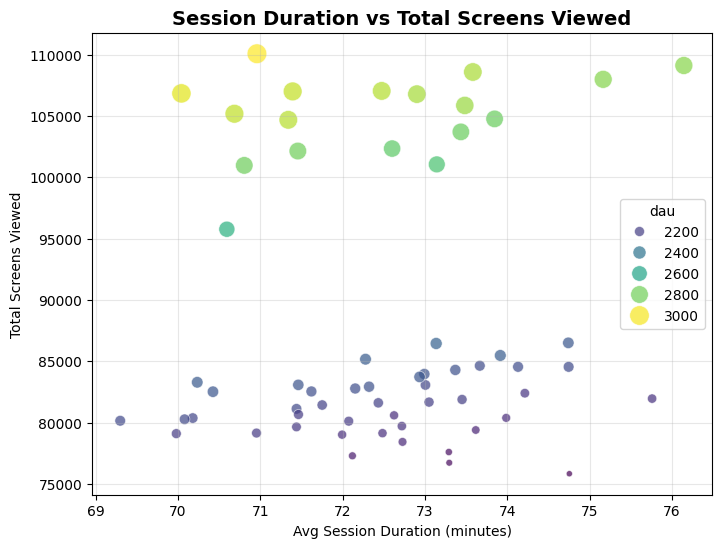

In [17]:
#4. Correlation with Engagement (Duration vs Screens Viewed)
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="avg_session_duration",
    y="total_screens_viewed",
    hue="dau",
    palette="viridis",
    size="dau",
    sizes=(20, 200),
    alpha=0.7,
    ax=ax
)

ax.set_title("Session Duration vs Total Screens Viewed", fontsize=14, fontweight='bold')
ax.set_xlabel("Avg Session Duration (minutes)")
ax.set_ylabel("Total Screens Viewed")
ax.grid(True, alpha=0.3)
plt.show()


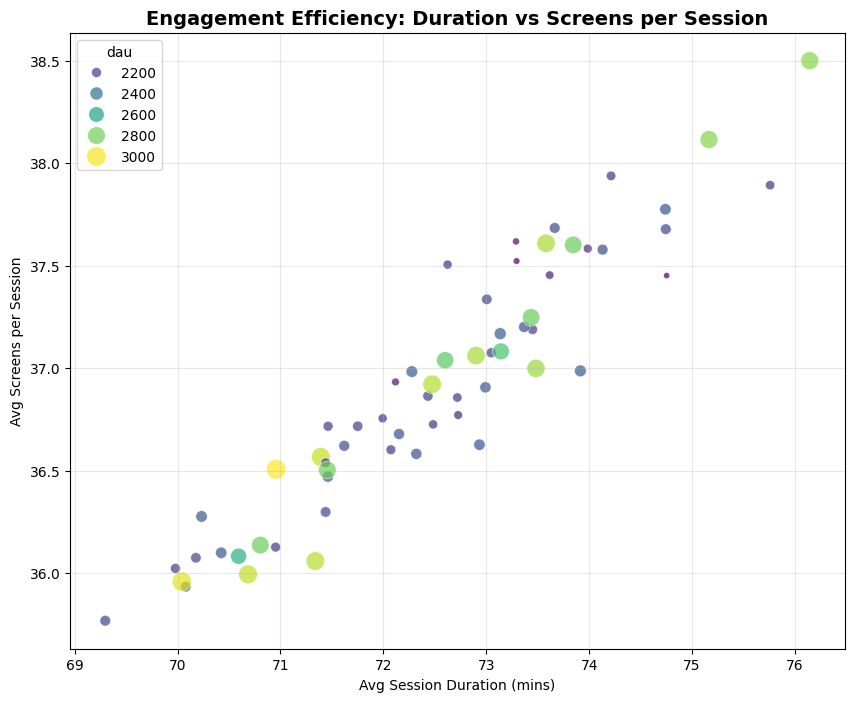

In [18]:
#5.Engagement Efficiency (Duration vs Screens per Session)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: avg duration vs avg screens per session
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(
    data=df, 
    x="avg_session_duration", 
    y="avg_screens_per_session", 
    hue="dau", 
    palette="viridis", 
    size="dau", 
    sizes=(20, 200), 
    alpha=0.7,
    ax=ax
)

# Labels and style
ax.set_title("Engagement Efficiency: Duration vs Screens per Session", fontsize=14, fontweight='bold')
ax.set_xlabel("Avg Session Duration (mins)")
ax.set_ylabel("Avg Screens per Session")
ax.grid(True, alpha=0.3)

plt.show()

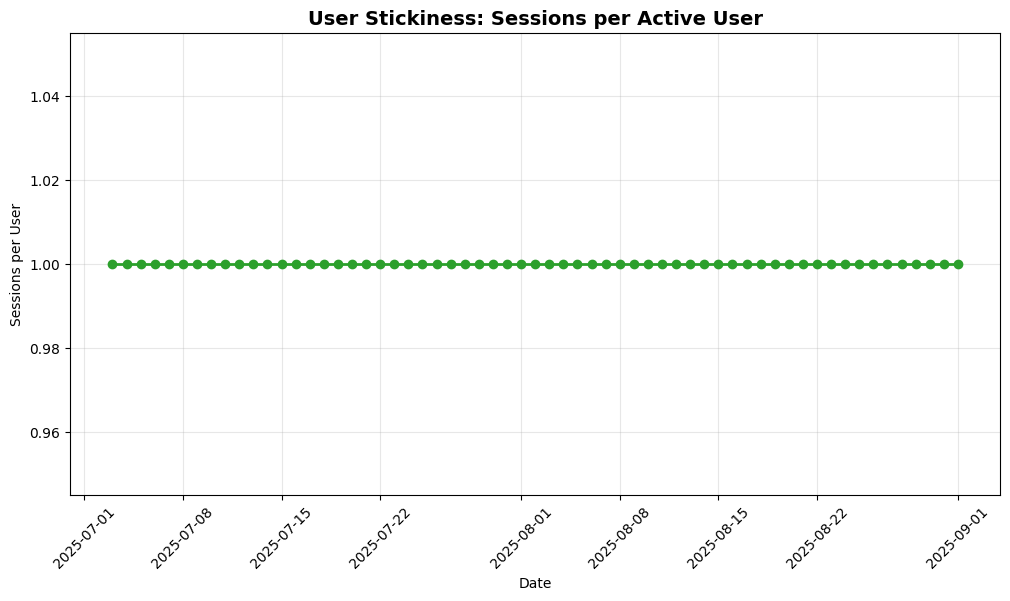

In [19]:
#6.User Stickiness (Sessions per User)
import pandas as pd
import matplotlib.pyplot as plt

# Calculate sessions per user (proxy for stickiness)
df['sessions_per_user'] = df['total_sessions'] / df['dau']

# Plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df['date'], df['sessions_per_user'], marker='o', color='#2ca02c', linewidth=2)

# Labels and style
ax.set_title("User Stickiness: Sessions per Active User", fontsize=14, fontweight='bold')
ax.set_xlabel("Date")
ax.set_ylabel("Sessions per User")
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.show()

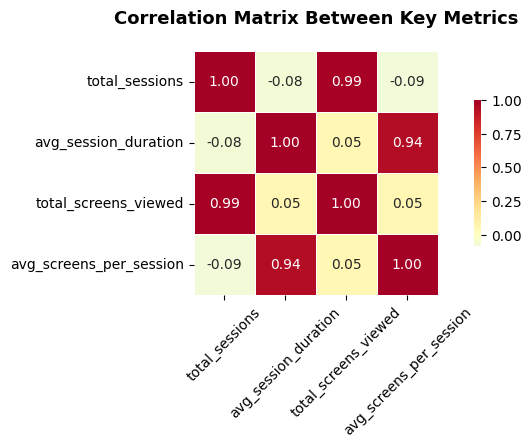

In [20]:
#7. Correlation heatmap (top right, spans 2 columns)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'])

# Set style and color palette
plt.style.use('default')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
sns.set_palette(colors)

# Create main figure with custom grid layout
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(4, 4, figure=fig, hspace=0.35, wspace=0.3)

ax2 = fig.add_subplot(gs[0, 2:])
numeric_cols = ['total_sessions', 'avg_session_duration', 'total_screens_viewed', 'avg_screens_per_session']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.6},
            linewidths=0.5, ax=ax2, annot_kws={'fontsize': 10})
ax2.set_title('Correlation Matrix Between Key Metrics', fontsize=13, fontweight='bold', pad=20)
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.tick_params(axis='y', rotation=0, labelsize=10)

In [21]:
#8.Key Calculations
mean_duration = df['avg_session_duration'].mean()
median_duration = df['avg_session_duration'].median()
max_duration = df['avg_session_duration'].max()
min_duration = df['avg_session_duration'].min()

print("Session Duration Stats:")
print(f" - Mean   : {mean_duration:.2f} minutes")
print(f" - Median : {median_duration:.2f} minutes")
print(f" - Min    : {min_duration:.2f} minutes")
print(f" - Max    : {max_duration:.2f} minutes")


Session Duration Stats:
 - Mean   : 72.50 minutes
 - Median : 72.60 minutes
 - Min    : 69.30 minutes
 - Max    : 76.14 minutes
